In [4]:
import vrep 
import sys
import time 
import numpy as np
from tank import *

In [5]:
vrep.simxFinish(-1) # closes all opened connections, in case any prevoius wasnt finished
clientID=vrep.simxStart('127.0.0.1',19999,True,True,5000,5) # start a connection

if clientID!=-1:
    print ("Connected to remote API server")
else:
    print("Not connected to remote API server")
    sys.exit("Could not connect")

#create instance of Tank
tank=Tank(clientID)

Connected to remote API server


In [6]:
proximity_sensors=["EN","ES","NE","NW","SE","SW","WN","WS"]
proximity_sensors_handles=[0]*8

# get handle to proximity sensors
for i in range(len(proximity_sensors)):
    err_code,proximity_sensors_handles[i] = vrep.simxGetObjectHandle(clientID,"Proximity_sensor_"+proximity_sensors[i], vrep.simx_opmode_blocking)
    
#read and print values from proximity sensors
#first reading should be done with simx_opmode_streaming, further with simx_opmode_buffer parameter
for sensor_name, sensor_handle in zip(proximity_sensors,proximity_sensors_handles):
        err_code,detectionState,detectedPoint,detectedObjectHandle,detectedSurfaceNormalVector=vrep.simxReadProximitySensor(clientID,sensor_handle,vrep.simx_opmode_streaming)

In [7]:
tank.forward(5)

#continue reading and printing values from proximity sensors
t = time.time()
while (time.time()-t)<5: # read values for 5 seconds
    for sensor_name, sensor_handle in zip(proximity_sensors,proximity_sensors_handles):
        err_code,detectionState,detectedPoint,detectedObjectHandle,detectedSurfaceNormalVector=vrep.simxReadProximitySensor(clientID,sensor_handle,vrep.simx_opmode_buffer )
        if(err_code == 0):
            print("Proximity_sensor_"+sensor_name, np.linalg.norm(detectedPoint))
    print()

ty_sensor_WN 2.1516836411338054
Proximity_sensor_WS 2.1516836411338054

Proximity_sensor_EN 1.024569473816336
Proximity_sensor_ES 1.0085740796415181
Proximity_sensor_NE 1.4025550074777249
Proximity_sensor_NW 3.6087007516507414
Proximity_sensor_SE 3.6087007516507414
Proximity_sensor_SW 3.6087007516507414
Proximity_sensor_WN 2.1516836411338054
Proximity_sensor_WS 2.1516836411338054

Proximity_sensor_EN 1.024569473816336
Proximity_sensor_ES 1.0085740796415181
Proximity_sensor_NE 1.4025550074777249
Proximity_sensor_NW 3.6087007516507414
Proximity_sensor_SE 3.6087007516507414
Proximity_sensor_SW 3.6087007516507414
Proximity_sensor_WN 2.1516836411338054
Proximity_sensor_WS 2.1516836411338054

Proximity_sensor_EN 1.024569473816336
Proximity_sensor_ES 1.0085740796415181
Proximity_sensor_NE 1.4025550074777249
Proximity_sensor_NW 3.6087007516507414
Proximity_sensor_SE 3.6087007516507414
Proximity_sensor_SW 3.6087007516507414
Proximity_sensor_WN 2.1516836411338054
Proximity_sensor_WS 2.1516836411

In [22]:
import skfuzzy as fuzz
# Inputs: 
#   "EN","ES","NE","NW","SE","SW","WN","WS"
#   Distance on each sensor
# Outputs:
#   forward, backward, left, right
#   forward(velo)
#   backward(velo)
#   turn_right(velo)
#   turn_left(velo)
# Rules:
#   if NW, WN, WS, SW big,then turn left slowly
#   if NW, WN, WS, SW low, then turn left sharply
x_nw = np.arange(0, 4, 1)
x_wn = np.arange(0, 4, 1)
x_ws = np.arange(0, 4, 1)
x_sw = np.arange(0, 4, 1)




nw_close = fuzz.trimf(x_nw, [0, 0, 2])
nw_mid = fuzz.trimf(x_nw, [0, 2, 4])
nw_far = fuzz.trimf(x_nw, [2, 4, 4])

wn_close = fuzz.trimf(x_wn, [0, 0, 2])
wn_mid = fuzz.trimf(x_wn, [0, 2, 4])
wn_far = fuzz.trimf(x_wn, [2, 4, 4])

ws_close = fuzz.trimf(x_ws, [0, 0, 2])
ws_mid = fuzz.trimf(x_ws, [0, 2, 4])
ws_far = fuzz.trimf(x_ws, [2, 4, 4])

sw_close = fuzz.trimf(x_sw, [0, 0, 2])
sw_mid = fuzz.trimf(x_sw, [0, 2, 4])
sw_far = fuzz.trimf(x_sw, [2, 4, 4])




In [ ]:
x_v_forward = np.arange(-10, 11, 1)
x_v_backward = np.arange(-10, 11, 1)
x_v_right = np.arange(-10, 11, 1)
x_v_left = np.arange(-10, 11, 1)

forward_fast = fuzz.trimf(x_v_forward, [-10, ])


backward_fast = fuzz.trimf(x_v_backward, [-10, ])


right_fast = fuzz.trimf(x_v_right, [-10, ])


left_fast = fuzz.trimf(x_v_left, [-10, ])


tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

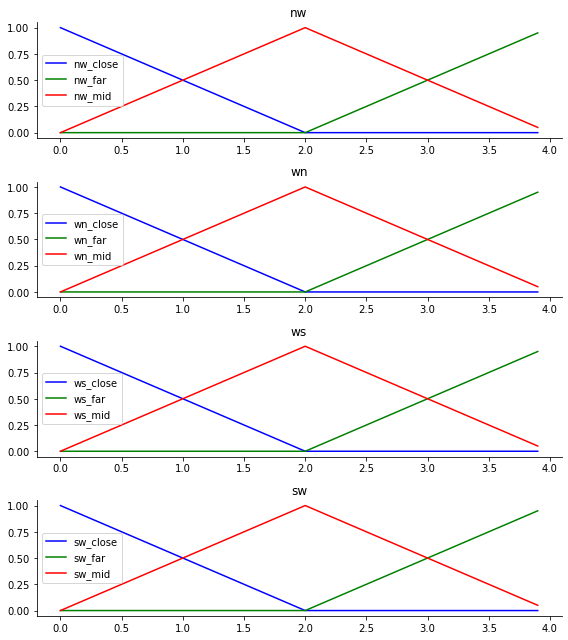

In [16]:
import matplotlib.pyplot as plt

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 9))

ax0.plot(x_nw, nw_close, 'b', linewidth=1.5, label='nw_close')
ax0.plot(x_nw, nw_far, 'g', linewidth=1.5, label='nw_far')
ax0.plot(x_nw, nw_mid, 'r', linewidth=1.5, label='nw_mid')
ax0.set_title('nw')
ax0.legend()

ax1.plot(x_wn, wn_close, 'b', linewidth=1.5, label='wn_close')
ax1.plot(x_wn, wn_far, 'g', linewidth=1.5, label='wn_far')
ax1.plot(x_wn, wn_mid, 'r', linewidth=1.5, label='wn_mid')
ax1.set_title('wn')
ax1.legend()

ax2.plot(x_ws, ws_close, 'b', linewidth=1.5, label='ws_close')
ax2.plot(x_ws, ws_far, 'g', linewidth=1.5, label='ws_far')
ax2.plot(x_ws, ws_mid, 'r', linewidth=1.5, label='ws_mid')
ax2.set_title('ws')
ax2.legend()

ax3.plot(x_sw, sw_close, 'b', linewidth=1.5, label='sw_close')
ax3.plot(x_sw, sw_far, 'g', linewidth=1.5, label='sw_far')
ax3.plot(x_sw, sw_mid, 'r', linewidth=1.5, label='sw_mid')
ax3.set_title('sw')
ax3.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [19]:
x_nw_level_close = fuzz.interp_membership(x_nw, nw_close, 3.431)
x_nw_level_mid = fuzz.interp_membership(x_nw, nw_mid, 3.431)
x_nw_level_far = fuzz.interp_membership(x_nw, nw_far, 3.431)

x_wn_level_close = fuzz.interp_membership(x_wn, wn_close, 1.22)
x_wn_level_mid = fuzz.interp_membership(x_wn, wn_mid, 1.22)
x_wn_level_far = fuzz.interp_membership(x_wn, wn_far, 1.22)

x_ws_level_close = fuzz.interp_membership(x_ws, ws_close, 0.312)
x_ws_level_mid = fuzz.interp_membership(x_ws, ws_mid, 0.312)
x_ws_level_far = fuzz.interp_membership(x_ws, ws_far, 0.312)

x_sw_level_close = fuzz.interp_membership(x_sw, sw_close, 2.86)
x_sw_level_mid = fuzz.interp_membership(x_sw, sw_mid, 2.86)
x_sw_level_far = fuzz.interp_membership(x_sw, sw_far, 2.86)

In [21]:
[x_nw_level_close,
x_nw_level_mid,
x_nw_level_far,
x_wn_level_close,
x_wn_level_mid,
x_wn_level_far,
x_ws_level_close,
x_ws_level_mid,
x_ws_level_far,
x_sw_level_close,
x_sw_level_mid,
x_sw_level_far]

[0.0,
 0.2845,
 0.7155,
 0.39,
 0.61,
 0.0,
 0.844,
 0.156,
 0.0,
 0.0,
 0.5700000000000001,
 0.42999999999999994]

In [ ]:
# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
tip_activation_lo = np.fmin(active_rule1, tip_lo)  # removed entirely to 0

# For rule 2 we connect acceptable service to medium tipping
tip_activation_md = np.fmin(serv_level_md, tip_md)

# For rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()